<a href="https://colab.research.google.com/github/sensiboi/AFAME-Technologies-DA-Task/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES DATA ANALYSIS**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import Dataset**

In [7]:
df=pd.read_excel("sales_data.xlsx", sheet_name='Orders')
df=pd.DataFrame(data=df)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


**Data Cleaning**

In [6]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


**Descriptive Analysis**

In [10]:
df['Total_Sales'] = df['Quantity'] * df['Sales']
summary = df.describe()
print(summary)

             Row ID                     Order Date  \
count   9994.000000                           9994   
mean   36293.500000  2013-04-30 19:20:02.401440768   
min    31297.000000            2011-01-04 00:00:00   
25%    33795.250000            2012-05-23 00:00:00   
50%    36293.500000            2013-06-27 00:00:00   
75%    38791.750000            2014-05-15 00:00:00   
max    41290.000000            2014-12-31 00:00:00   
std     2885.163629                            NaN   

                           Ship Date   Postal Code         Sales     Quantity  \
count                           9994   9994.000000   9994.000000  9994.000000   
mean   2013-05-04 18:20:49.229537792  55190.379428    229.858001     3.789574   
min              2011-01-08 00:00:00   1040.000000      0.444000     1.000000   
25%              2012-05-27 00:00:00  23223.000000     17.280000     2.000000   
50%              2013-06-30 00:00:00  56430.500000     54.490000     3.000000   
75%              2014-05-19

**Trend Analysis**

In [11]:
sales_trend = df.groupby('Order Date')['Total_Sales'].sum().reset_index()

In [12]:
sales_trend

,Order Date,Total_Sales
0,2011-01-04,32.8960
1,2011-01-05,860.6400
2,2011-01-06,58.6080
3,2011-01-07,28430.7800
4,2011-01-08,303.1940
...,...,...
1233,2014-12-27,1779.4700
1234,2014-12-28,381.7680
1235,2014-12-29,7074.4516
1236,2014-12-30,14749.8300


**Product Sales**

In [13]:
product_sales = df.groupby('Product Name').agg({'Quantity': 'sum', 'Total_Sales': 'sum'}).reset_index()

In [14]:
product_sales

,Product Name,Quantity,Total_Sales
0,"""While you Were Out"" Message Book, One Form pe...",8,68.264
1,"#10 Gummed Flap White Envelopes, 100/Box",11,125.552
2,#10 Self-Seal White Envelopes,10,463.562
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32,2820.600
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37,1366.936
...,...,...,...
1836,iKross Bluetooth Portable Keyboard + Cell Phon...,24,3268.200
1837,iOttie HLCRIO102 Car Mount,12,879.560
1838,iOttie XL Car Mount,14,1695.152
1839,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,29,1975.302


**Customer Analysis**

In [15]:
customer_sales = df.groupby('Customer ID').agg({'Total_Sales': 'sum', 'Product Name': 'count'}).reset_index()

In [16]:
customer_sales

,Customer ID,Total_Sales,Product Name
0,AA-10315,16073.344,11
1,AA-10375,2734.830,15
2,AA-10480,5493.936,12
3,AA-10645,22927.855,18
4,AB-10015,1984.480,6
...,...,...,...
788,XP-21865,8676.214,28
789,YC-21895,27208.926,8
790,YS-21880,46478.992,12
791,ZC-21910,40212.889,31


# **Visualization**

**Sales Trend**

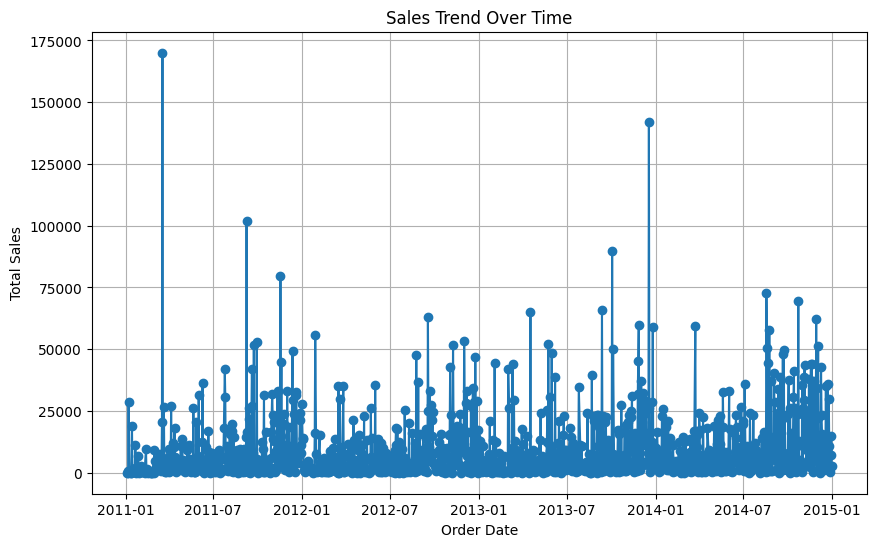

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(sales_trend['Order Date'], sales_trend['Total_Sales'], marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

**Best Selling Product**

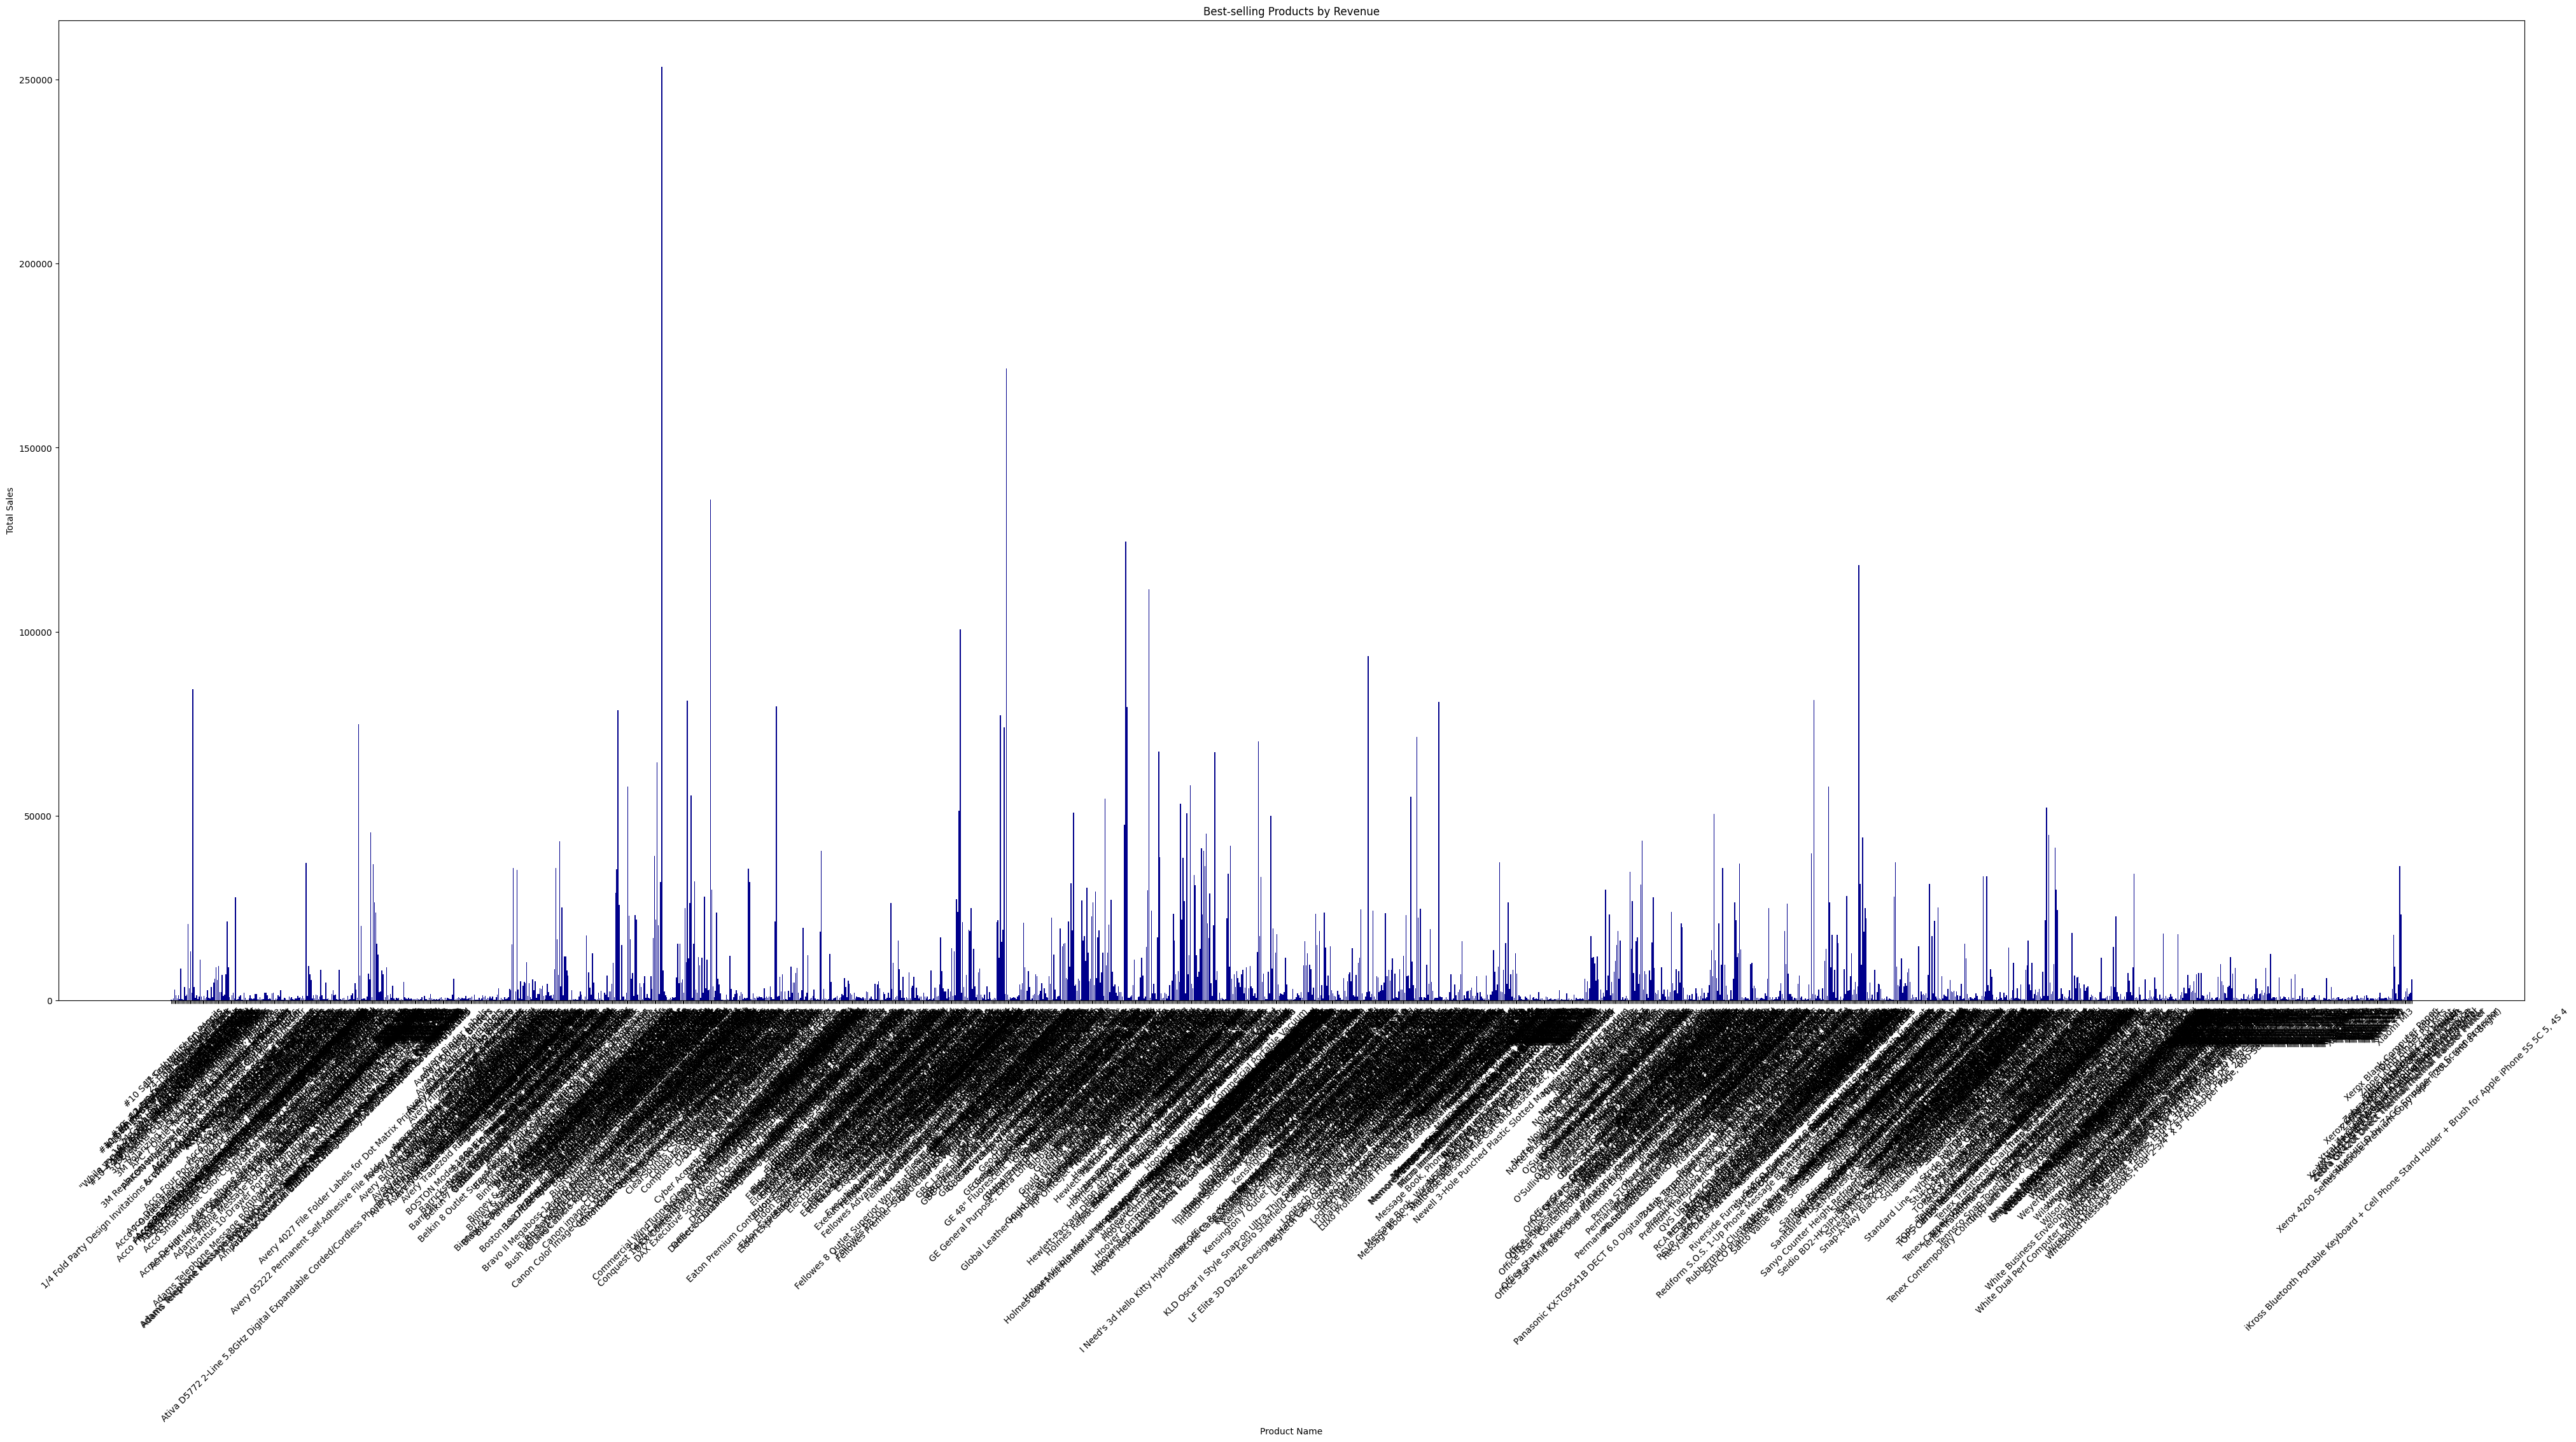

In [19]:
plt.figure(figsize=(50, 20))
plt.bar(product_sales['Product Name'], product_sales['Total_Sales'], color='darkblue')
plt.title('Best-selling Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()